<a href="https://colab.research.google.com/github/Charlie-Petty/IS_4487_Tokyo/blob/main/Copy_of_day3_lab_retailer_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 Lab, IS 4487

Outline

Repeat exercises from Lab 2, for practice, but with the *SuperStore Retail Orders* dataset

- Loading installed packages
- Inspect data
- Clean data
- Summarize data
- Explore plot types and search for insights

Please use the Gemini AI tool to get coding ideas.



# Notebook Instructions
- Remember to save a copy of the notebook in Drive so that you can save your changes.
- Complete the Assignment Tasks.
- When you are done revising this notebook save your changes to GitHub and upload the URL for the file to Canvas for the assignment.
- Some of these assignments ask you to do things we have not covered yet.  Use AI to come up with a solution.

# Load Libraries

➡️ Assignment Tasks
- Load Pandas

In [4]:
# your code goes here
!pip install pandas
import pandas as pd


# Load Data

In [5]:
ss = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/main/Labs/DataSets/superstore_retail_orders.csv")

# Summarize and Review Data

➡️ Assignment Tasks

- Describe or profile the dataframe

In [ ]:
# Your code goes here

In [6]:
ss.describe()

,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


# Prepare Data

➡️ Assignment Tasks
- Remove rows with empty (NULL) values
- Locate outliers in any of the variables.   Filter them out if they appear to be mistakes; keep them if they are exceptional cases.
- Create a new field: total_purchase. This should be product_price x quantity.

In [7]:
# Drop NAs
ss.dropna(inplace=True)

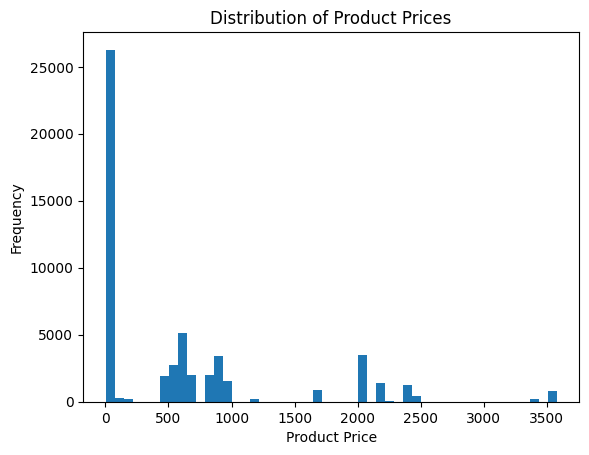

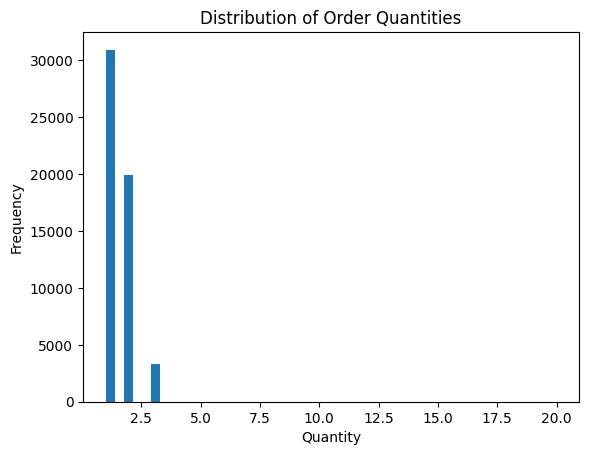

In [22]:
# Search for and filter outliers
import matplotlib.pyplot as plt

ss = ss[ss['product_price'] < 50000]
plt.hist(ss['product_price'], bins=50)
plt.xlabel('Product Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices')
plt.show()

quantity_threshold = 99  # Set your threshold here
ss = ss[ss['quantity'] <= quantity_threshold]

plt.hist(ss['quantity'], bins=50)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Order Quantities')
plt.show()

In [20]:
# create total_purchase
ss['total_purchase'] = ss['product_price'] * ss['quantity']

Check that your cleaning worked

In [23]:
# your code goes here
ss.describe()

,order_id,quantity,product_price,total_purchase
count,54168.000000,54168.000000,54168.000000,54168.000000
mean,61642.878674,1.490400,613.954864,686.580205
std,7518.127211,0.615206,816.421615,906.180586
min,45079.000000,1.000000,2.290000,2.290000
25%,55623.750000,1.000000,7.950000,14.970000
50%,61855.500000,1.000000,475.600000,475.600000
75%,68063.000000,2.000000,914.620000,1000.440000
max,74147.000000,20.000000,3578.270000,71565.400000


# Summarize Data

➡️ Assignment Tasks
- Calculate the average price per year-month
- Calculate the total revenue per year month

Does more cleaning need to be done? If so, do it and then recreate the above summary tables.

In [26]:

from datetime import datetime

# average price
# Handle dates outside the normal range and filter
ss['year_month'] = pd.to_datetime(ss['order_date'], errors='coerce').dt.to_period('M')

# Filter dates between 2019 and current date
start_date = pd.to_datetime('2019-01-01').to_period('M')
end_date = pd.to_datetime(datetime.now()).to_period('M')
ss_filtered = ss[(ss['year_month'] >= start_date) & (ss['year_month'] <= end_date)]

avg_price_by_month = ss_filtered.groupby('year_month')['product_price'].mean()
avg_price_by_month

year_month
2020-01    3166.817293
2020-02    3199.469359
2020-03    3242.035279
2020-04    3194.646275
2020-05    3192.571359
2020-06    3132.275911
2020-07    1959.974251
2020-08    1924.981087
2020-09    1764.130833
2020-10    1800.830762
2020-11    1666.368901
2020-12    1729.697795
2021-01    1774.621612
2021-02    1755.272269
2021-03    1760.495962
2021-04    1691.161107
2021-05    1640.100368
2021-06    1694.477581
2021-07     729.851550
2021-08     409.107649
2021-09     437.462140
2021-10     434.127245
2021-11     468.310875
2021-12     500.330821
2022-01     469.658801
2022-02     481.718170
2022-03     485.373182
2022-04     482.481023
2022-05     513.701953
2022-06     509.168107
Freq: M, Name: product_price, dtype: float64

In [27]:
# total revenue
ss_filtered['total_revenue'] = ss_filtered['product_price'] * ss_filtered['quantity']
total_revenue_by_month = ss_filtered.groupby('year_month')['total_revenue'].sum()
total_revenue_by_month

<ipython-input-27-d0f3218f25a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss_filtered['total_revenue'] = ss_filtered['product_price'] * ss_filtered['quantity']


year_month
2020-01     573193.93
2020-02     499117.22
2020-03     706668.08
2020-04     651707.84
2020-05     657669.70
2020-06     635852.01
2020-07     484113.64
2020-08     531294.78
2020-09     338713.12
2020-10     401585.26
2020-11     303279.14
2020-12     556962.69
2021-01     429458.43
2021-02     456370.79
2021-03     466531.43
2021-04     488745.56
2021-05     534672.72
2021-06     525288.05
2021-07    1072057.49
2021-08    1782453.48
2021-09    1864925.94
2021-10    2012010.82
2021-11    2152333.56
2021-12    2890764.61
2022-01    2398289.17
2022-02    2355462.16
2022-03    2609889.06
2022-04    2685226.38
2022-05    3049943.70
2022-06    2959952.22
Freq: M, Name: total_revenue, dtype: float64

# Plot Data

➡️ Assignment Tasks
- Produce two plots that show patterns or relationships in the data.
- Interpret these patterns for potential value to the business.  

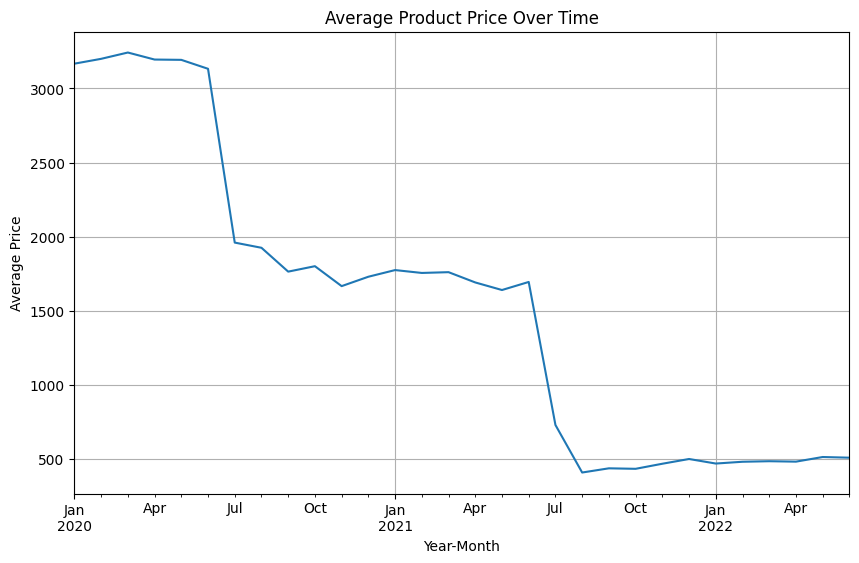

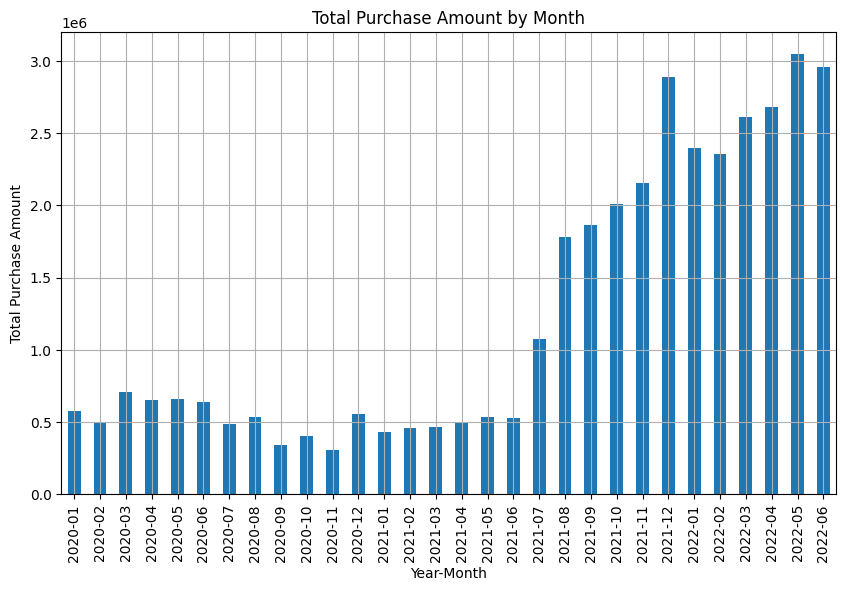

In [29]:

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Handle dates and filter
ss['year_month'] = pd.to_datetime(ss['order_date'], errors='coerce').dt.to_period('M')
start_date = pd.to_datetime('2019-01-01').to_period('M')
end_date = pd.to_datetime(datetime.now()).to_period('M')
ss_filtered = ss[(ss['year_month'] >= start_date) & (ss['year_month'] <= end_date)].copy() # Create an explicit copy

# Plot 1: Average price over time
avg_price_by_month = ss_filtered.groupby('year_month')['product_price'].mean()
plt.figure(figsize=(10, 6))
avg_price_by_month.plot(kind='line')
plt.title('Average Product Price Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

# Plot 2: Total purchase amount by month
ss_filtered.loc[:, 'total_purchase'] = ss_filtered['product_price'] * ss_filtered['quantity'] # Use .loc for safe assignment
total_purchase_by_month = ss_filtered.groupby('year_month')['total_purchase'].sum()
plt.figure(figsize=(10, 6))
total_purchase_by_month.plot(kind='bar')
plt.title('Total Purchase Amount by Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Purchase Amount')
plt.grid(True)
plt.show()

In [ ]:
#Based on plot 1 the average price of a product decreases year over year.
#Since most of the items sold are phones the decrease in price could be
#because of a drop in the price of materials

#Based in plot 2 the total purchase amount increased significantly
# during mid 2021, and purchase amount continued to grow almost every month.
# This could be because of more traffic to the site due to better marketing.

Make an interpretive comment.